In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

import scipy as sp
from scipy import signal, fftpack
# from scipy.signal import find_peaks, gaussian_filter1d, argrelmax
from scipy.io import loadmat
from statistics import median, mean

import glob
import os
import ntpath

def load_ekgs() -> tuple((np.ndarray, dict[str: None])):
    ekgs = []
    features = []
    sources = os.listdir('./training')
    sources.remove('.DS_Store')
    sources.remove('index.html')
    for source in [sources[0]]:
    # for source in sources:
        gs = os.listdir('./training/' + source)
        gs.remove('index.html')
        for g in [gs[0]]:
        # for g in gs:
            path = './training/' + source + '/' + g
            for file in os.listdir(path):
                if file[-4:] == '.mat':
                    print(file)
                    ekg, feature = load_ekg(path + '/' + file[:-4])
                    ekgs.append(ekg)
                    features.append(feature)
    return np.array(ekgs), pd.DataFrame(data=features)


In [2]:
def load_ekg(filename: str) -> tuple((np.ndarray, dict[str: None])):
    """
    Loads all
    """
    # Load the ekg voltage data from the .mat file
    ekg = loadmat(filename + '.mat')['val']

    # Load the features from the .hea file
    f = open(filename + '.hea', 'r')
    features = {}
    for line in f:
        if line[0] == '#':
            contents = line.split(' ')[1:]
            features[contents[0]] = contents[1][:len(contents[1])-1]
    return ekg, features


In [191]:
from scipy.signal import find_peaks
from sklearn import preprocessing
import statistics

ekg,features=load_ekg("training/chapman_shaoxing/g1/JS00042")

def beat_characteristics(ekg,lead_num):
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    
    lead = ekg[lead_num][1000:4000]    
    all_peaks, _ = find_peaks(lead, height=max(lead)/1.4, distance=150)

    intervals = np.diff(all_peaks)
    intervals_normalized = scaler.fit_transform(np.reshape(intervals,(-1,1)))

    RR_var = statistics.variance(intervals)
    RR_var_normalized = statistics.variance(np.reshape(intervals_normalized,(1,len(intervals_normalized)))[0])
    HR = 30000/statistics.mean(result)
    
    return HR, RR_var, RR_var_normalized

def is_invalid(ekg):
    for lead_num in range(12):
        HR, RR_var, RR_var_normalized = beat_characteristics(ekg,lead_num)
        if RR_var >100000:
            return True
    return False
    

In [192]:
beat_characteristics(ekg,1)
is_invalid(ekg)

True

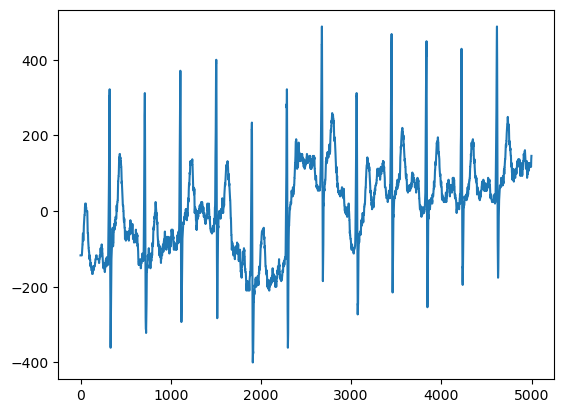

In [186]:
plt.plot(ekg[1])